In [11]:
from decision_tree import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Proportion of the dataset to include in the test split
test_size = 0.2
# Controls the shuffling applied to the data before applying the split (pass int for reproducible output across multiple function 
# calls)
random_state = 42
# The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” 
# both for the Shannon information gain
criterion = 'gini'
# The maximum depth of the tree. i=If None, then nodes are expanded until all leaves are pure or until all leaves contain less than 
# min_samples_split samples
max_depth = None
# The minimum number of samples required to split an internal node
min_samples_split = 2
# The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at 
# least min_samples_leaf training samples in each of the left and right branches.
min_samples_leaf = 1

In [4]:
anatel_file_path = '../../data/labeled_csv_files/Anatel_labeled.csv'

anatel = pd.read_csv(anatel_file_path)

# One-Hot Encoding
anatel = pd.get_dummies(anatel, columns=['Polarization'], prefix='Polarization')
anatel = pd.get_dummies(anatel, columns=['BasicFeatures'], prefix='BasicFeatures')
# Decision trees and random forests can handle boolean variables without encoding. They naturally make binary decisions based on the values of the features.

# Split data into features and target
X = anatel.drop("SiteType", axis=1)
y = anatel["SiteType"]

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Build and Train the Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=random_state, criterion=criterion, max_depth=max_depth, 
                                    min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
tree_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = tree_model.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [17]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
feature_importances = tree_model.feature_importances_
print("Feature Importances:\n", feature_importances)

In [ ]:
scores = cross_val_score(tree_model, X, y, cv=5)
print("Cross-Validation Scores:", scores)


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Accuracy: 0.8143973822941284

Classification Report: 
               precision    recall  f1-score   support

         COW       0.50      0.46      0.48        28
    FASTSITE       0.33      0.33      0.33         3
  GREENFIELD       0.89      0.89      0.89      8509
 HARMONIZADA       0.26      0.38      0.31        26
      INDOOR       0.84      0.78      0.81       241
     OUTDOOR       0.43      0.36      0.39        33
 RAN SHARING       0.77      0.80      0.78       298
     ROOFTOP       0.49      0.49      0.49      1707
   SMALLCELL       0.90      0.80      0.85        55
 STREETLEVEL       0.64      0.59      0.61       102

    accuracy                           0.81     11002
   macro avg       0.60      0.59      0.59     11002
weighted avg       0.81      0.81      0.81     11002



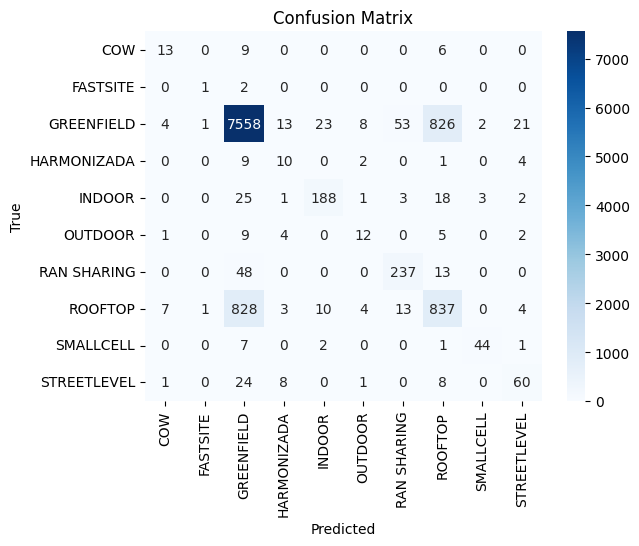

In [18]:
print(f"Accuracy: {accuracy}")

print(F"\nClassification Report: \n {cr}")

class_names = tree_model.classes_
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()